# Components of K-Means Clustering

### Introduction

In the previous section, we saw how to work with k-means clustering in sklearn.  In this lesson, let's begin to understand the k-means clustering algorithm by unpacking the hypothesis function, cost function, and optimization procedure.  Along the way, we'll learn about centroids and how they play a role in each of these components. 

### Loading the Data

In [1]:
import pandas as pd
df_train = pd.read_feather('./bnb_train.feather')
df_X_train = df_train.drop(columns = ['price'])
y_train = df_train.price

df_val = pd.read_feather('./bnb_val.feather')
df_X_val = df_train.drop(columns = ['price'])
y_val = df_train.price

In [2]:
X_geo = df_X_train.loc[:, ['longitude', 'latitude']]

In [3]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=9, init='random')
kmean.fit(X_geo)
cluster_labels = kmean.labels_

### Hypothesis Function

This brings us to the hypothesis function for clustering:

$h_\theta(x_i) \approx x_i $

This is to say that we want the hypothesis function to return to us an output that is close to the original input.  This is what we do with our geographic data.  Each of the labels corresponds with a `centroid`.  A centroid is just a point on the graph.

In [10]:
kmean.cluster_centers_

array([[13.43186856, 52.48488265],
       [13.35296108, 52.54461626],
       [13.45900299, 52.51650482],
       [13.37135399, 52.48912575],
       [13.60523213, 52.45498044],
       [13.41176757, 52.54029867],
       [13.30900713, 52.49251953],
       [13.1987617 , 52.51030432],
       [13.50461169, 52.49050636]])

For each observation, we simply find closest centroid, and the centroid's corresponding label is assigned.

Let's say that $u$ is a centroid in the set $\{u_1...u_k\}$

So, more formally, we can say that our hypothesis function is:

$h_\theta(x)=\underset{u}{\mathrm{argmin}} || u - x_i||^2$

In other words, for the hypothesis function we input our observation features, and we return the closest centroid. 

### Supervised vs Unsupervised Learning

Notice how here training and our hypothesis function is different than in previous algorithms.  In previous lessons, we have seen a type of machine learning where called supervised learning.  With supervised learning, we have a feature matrix X, and a target vector $y$, and the goal is to find the parameters, $\theta$ that predict $y$.

Clustering is our first example of an unsupervised learning problem.  With our unsupervised learning problem we no longer are considering our target variable in the training of our hypothesis function.  Instead we feed our clustering algorithm a feature matrix, and we return a grouping of those features. 

Before moving onto the cost function, let's take step back to compare our unsupervised hypothesis function with our supervised hypothesis function.

* supervised: 
    * $h_\theta(x_i) \approx y_i $
* unsupervised: 
    * $h_\theta(x_i) \approx x_i $

So in both cases we trying to come close to an observation, it's just that in supervised learning we try to come close to the observation's target variable, while with supervised learning we come close to the observation's original features.

### Cost Function

This perhaps leads us to the cost function.  Just as with supervised learning, our cost function is the distance of our hypothesis function from the observed data, in unsupervised learning it's the same.

Now with clustering, we calculate each point's distance from the cluster.

In [8]:
kmean.cluster_centers_

array([[13.43186856, 52.48488265],
       [13.35296108, 52.54461626],
       [13.45900299, 52.51650482],
       [13.37135399, 52.48912575],
       [13.60523213, 52.45498044],
       [13.41176757, 52.54029867],
       [13.30900713, 52.49251953],
       [13.1987617 , 52.51030432],
       [13.50461169, 52.49050636]])

In [4]:
pwd

'/Users/jeff/Documents/jigsaw/curriculum/yeshiva-notes/labs/13-interpreting-forests/7-unpacking-clustering'

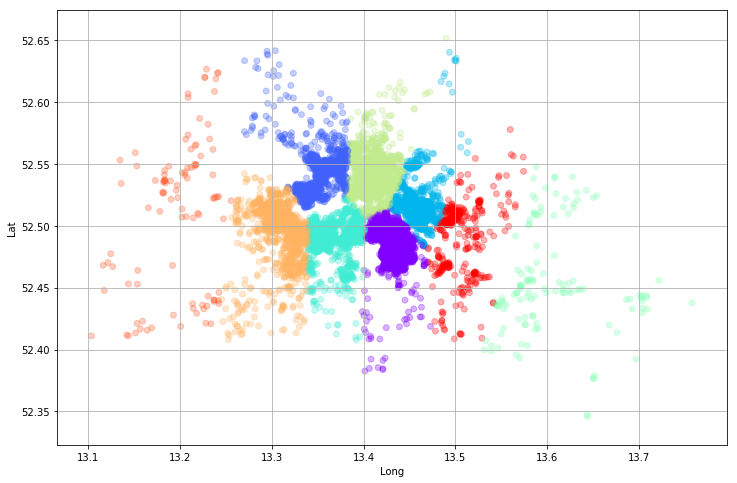

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.scatter(X_geo.iloc[:, 0], X_geo.iloc[:, 1], c=cluster_labels,  cmap=plt.cm.rainbow, s=35, linewidths=1, alpha=.3)
plt.xlabel('Long'), plt.ylabel('Lat')
plt.grid()

So for each point, we add up the distance from the centroid of it's category.

So the goal of k-means clustering is: 
* to find a set of centroids such that the loss function is minimized, that is, each datapoint is close to at least one center.

How does it do that? This brings us to the optimization procedure.  

### Optimization Procedure

Our optimization procedure is the following:

1. Computing the distance between all points and all clusters
2. Compute the cluster assignment of each point
3. Recomputing the centers to be the average of their points

When no datapoints switch clusters, we stop.  We return these centroids plus the squared loss of the function.

> 1. Randomly assign centroids

> 2. Use hypothesis function to assign points to centroids

<img src="./cluster-3.png" width="40%"/> 

> 3. Recompute centroid to be point that minimizes weighted distance
> 4. Use hypothesis function to assign points to new centroids

<img src="./cluster-2.png" width="40%"/> 

> 5. Recompute centroid to be point that minimizes weighted distance of reclassified points

<img src="./cluster-1.png" width="40%"/> 

### Determining the number of clusters

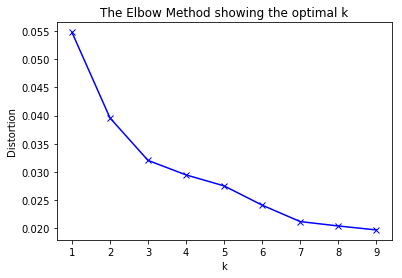

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_geo)
    kmeanModel.fit(X_geo)
    distortions.append(sum(np.min(cdist(X_geo, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_geo.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Summary

In this lesson, we saw how the k-means clustering algorithm operates.  We have a hypothesis function that categorizes an observation into a cluster based on the cluster that is closest to the observation.  The cost function calculates the distance of each observation's from it's assigned centroid.  And we have an optimization procedure that first randomly assigns centroids, then applies the hypothesis function to categorize the data, and then updates each centroid such that it centroid's location minimizes the aggregate distance of it's assigned observations. 